In [132]:
import yfinance as yf
# Pasirenkame bent 3 skirtingus aktyvus(reikalavimas LD1)
assets = ['BTC-USD','AAPL','GC=F','VWCE.DE','IXUA.DE', 'ETH-USD']
data = yf.download(assets, start ='2024-01-01', end ='2026-02-01')
close_prices = data ['Close']
# Tikriname, ar nera NaN reiksmiu
print(close_prices.isnull().sum())

[*********************100%***********************]  6 of 6 completed

Ticker
AAPL       240
BTC-USD      0
ETH-USD      0
GC=F       238
IXUA.DE    508
VWCE.DE    235
dtype: int64


In [ ]:
import pandas as pd

df = yf.download('BTC-USD', start='2024-06-01')
# yfinance returns a DataFrame with a MultiIndex column(e.g. Price / BTC-USD).
# Plotly expects simple Series objects, so we need to pull the single ticker out.
if isinstance(df.columns, pd.MultiIndex):
    # xs selects the sub‑DataFrame for the given ticker label at level 1
    df = df.xs('BTC-USD', axis=1, level=1)

fig = go.Figure(
    data=[go.Candlestick(x=df.index,
                        open=df['Open'],
                        high=df['High'],
                        low=df['Low'],
                        close=df['Close'],
                        name='Market Data')]
)
fig.update_layout(title='BTC / USD Interaktyvus grafikas',
                  yaxis_title='Kaina',
                  xaxis_title='Data')
fig.show()

[*********************100%***********************]  1 of 1 completed


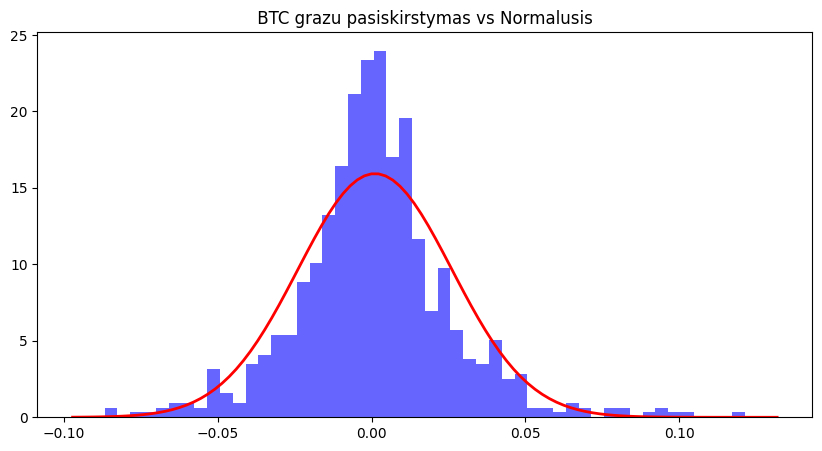

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

returns = close_prices["BTC-USD"].pct_change().dropna()
# Histogramos ir normaliojo skirstinio palyginimas
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=50, density=True, alpha=0.6, color="b")
# Uzdedame normaliaja kreive(Theoretical Normal)
mu, std = stats.norm.fit(returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2)
plt.title(" BTC grazu pasiskirstymas vs Normalusis ")
plt.show()


In [ ]:
# Istorinis metodas
var_95_hist = np.percentile(returns, 5)
# Parametrinis metodas(tariant normaluji skirstini)
var_95_param = stats.norm.ppf(0.05, mu, std)
print(f" Istorinis VaR(95%) : {var_95_hist:.4f} ")
print(f" Parametrinis VaR(95%) : {var_95_param:.4f} ")
# Skaiciuojame Expected Shortfall(CVaR)
cvar_95 = returns [ returns <= var_95_hist ]. mean()
print(f" Expected Shortfall(ES) : {cvar_95:.4f} ")

 Istorinis VaR (95%) : -0.0393 
 Parametrinis VaR (95%) : -0.0401 
 Expected Shortfall ( ES ) : -0.0536 


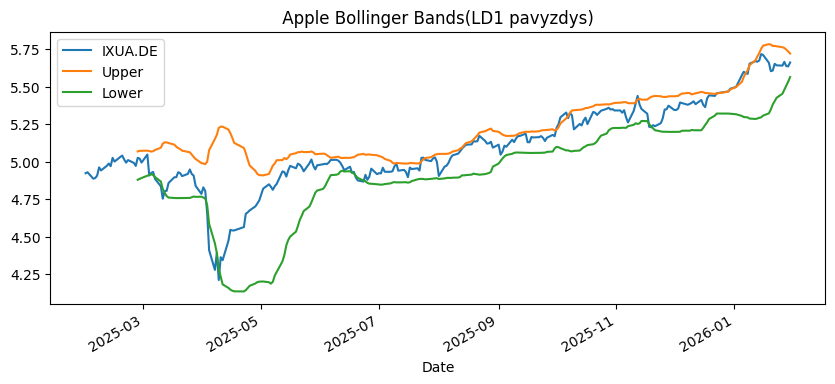

In [ ]:
# Programuojame rankiniu budu(naudojant Pandas)
window = 20
# dropna() pasalina savaitgaliu/sventes eilutes(atsiranda del BTC-USD, kuris prekiauja kiekviena diena)
data_bb = pd.DataFrame(close_prices["AAPL"].dropna())
# Vidurio linija(SMA)
data_bb["MA20"] = data_bb["AAPL"].rolling(window=window).mean()
# Standartinis nuokrypis
data_bb["STD"] = data_bb["AAPL"].rolling(window=window).std()
# Virsutine ir apatine juostos
data_bb["Upper"] = data_bb["MA20"] +(data_bb["STD"] * 2)
data_bb["Lower"] = data_bb["MA20"] -(data_bb["STD"] * 2)
data_bb[["AAPL", "Upper", "Lower"]].plot(figsize=(10, 4))
plt.title(" Apple Bollinger Bands(LD1 pavyzdys) ")
plt.show()


Text(0.5, 1.0, ' Aktyvu koreliacijos matrica ')

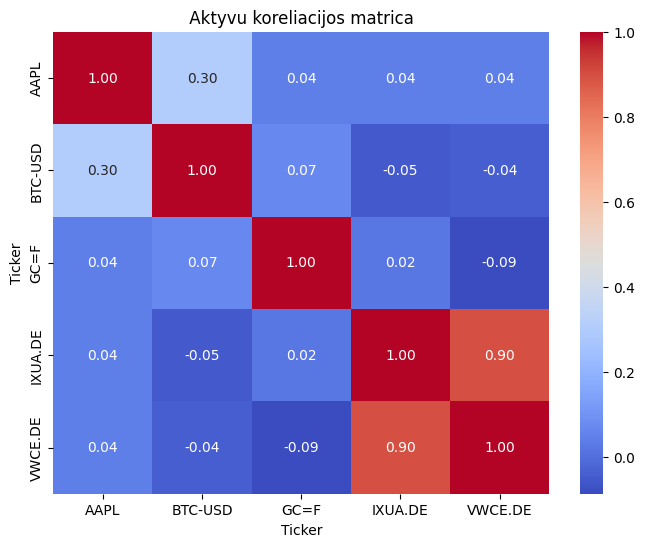

In [71]:
import seaborn as sns
# Grazu matrica
all_returns = close_prices.pct_change().dropna()
# Koreliacijos apskaiciavimas
corr_matrix = all_returns.corr()
# Vizualizacija naudojant Heatmap
plt.figure(figsize =(8,6))
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm', fmt = ".2f")
plt.title(" Aktyvu koreliacijos matrica ")

 Aptiktos anomalijos ( dienos ) : 
Date
2024-01-12   -0.075815
2024-02-28    0.094935
2024-03-04    0.081736
2024-03-19   -0.083434
2024-03-20    0.096925
2024-05-15    0.076596
2024-05-20    0.078002
2024-08-08    0.121443
2024-11-06    0.090536
2024-11-11    0.102235
2025-03-02    0.095505
2025-03-03   -0.086820
2025-04-09    0.082625
Name: BTC-USD, dtype: float64


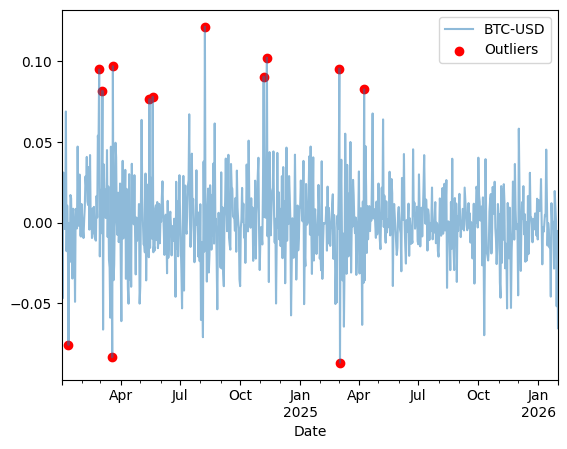

In [ ]:
# Apskaiciuojame kainos pokyciu Z-score
data_z = ( returns-returns . mean () ) / returns . std ()
# Randame dienas , kai nuokrypis virsyja 3 standartinius nuokrypius
outliers = returns [ np . abs ( data_z ) > 3]
print ( " Aptiktos anomalijos ( dienos ) : " )
print ( outliers )
# Vizualizacija
returns . plot ( alpha =0.5)
plt . scatter ( outliers . index , outliers , color ='red', label ='Outliers')
plt . legend ()
plt . show ()

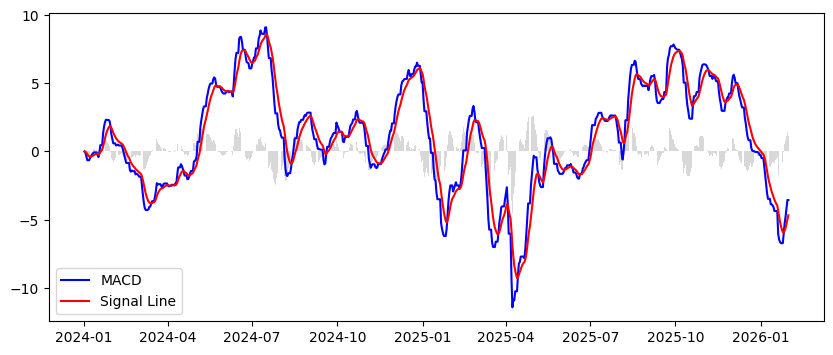

In [ ]:
# MACD skaiciavimas (12 ir 26 dienu EMA )
exp1 = close_prices ['AAPL']. ewm ( span =12 , adjust = False ) . mean ()
exp2 = close_prices ['AAPL']. ewm ( span =26 , adjust = False ) . mean ()
macd = exp1-exp2
signal = macd . ewm ( span =9 , adjust = False ) . mean ()
# Vizualizacija
plt . figure ( figsize =(10 ,4) )
plt . plot ( macd , label ='MACD', color ='blue')
plt . plot ( signal , label ='Signal Line', color ='red')
plt . bar ( macd . index , macd-signal , color ='gray', alpha =0.3)
plt . legend ()
plt . show ()

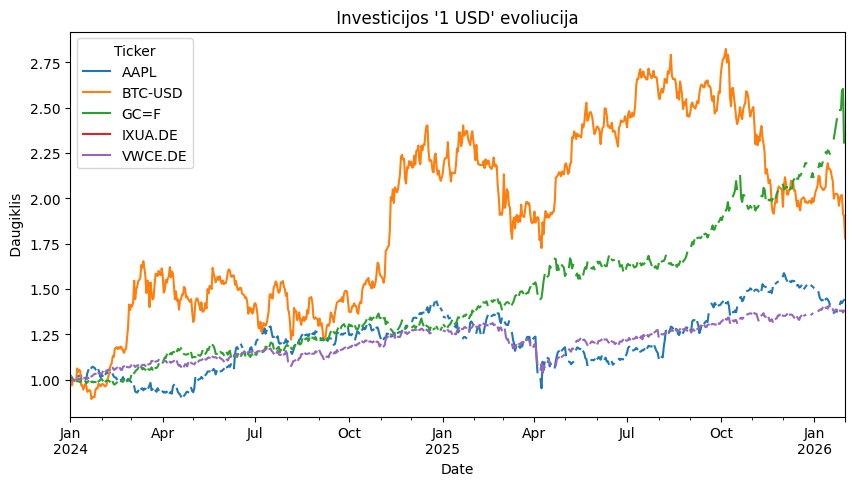

In [ ]:
# Normalizuojame : kiekviena kaina daliname is p r a d i n s r e i k m s
normalized_data = close_prices / close_prices.iloc[3]
normalized_data.plot(figsize=(10, 5))
plt.title(" Investicijos'1 USD'evoliucija ")
plt.ylabel(" Daugiklis ")
plt.show()


 Maximum Drawdown : -36.98% 


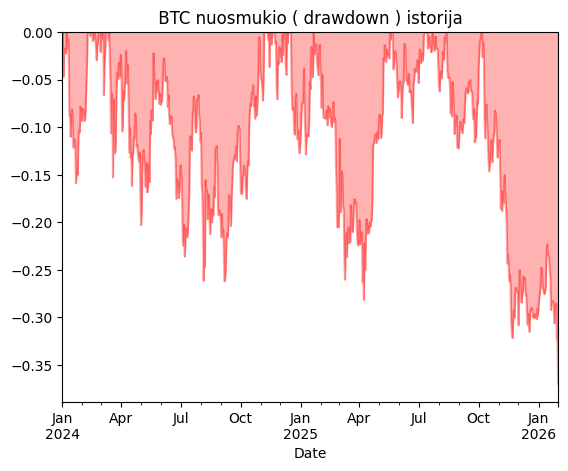

In [ ]:
# Skaiciuojame b g a n t m a k s i m u m
rolling_max = close_prices ['BTC-USD'].cummax ()
drawdown = ( close_prices ['BTC-USD']-rolling_max ) / rolling_max
max_drawdown = drawdown . min ()
print ( f" Maximum Drawdown : { max_drawdown :.2%} " )
drawdown . plot ( kind ='area', color ='red', alpha =0.3)
plt . title ( " BTC nuosmukio ( drawdown ) istorija " )
plt . show ()

In [ ]:
# Metine grazos ir volatilumo prognoze ( supaprastinta )
risk_free_rate = 0.03 # Tarkime , JAV obligaciju palukanos 3%
annual_return = returns . mean () * 252
annual_std = returns . std () * np . sqrt (252)
sharpe_ratio = ( annual_return-risk_free_rate ) / annual_std
print ( f" Annualized Return : { annual_return :.2%} " )
print ( f" Sharpe Ratio : { sharpe_ratio :.2f} " )

 Annualized Return : 26.95% 
 Sharpe Ratio : 0.60 


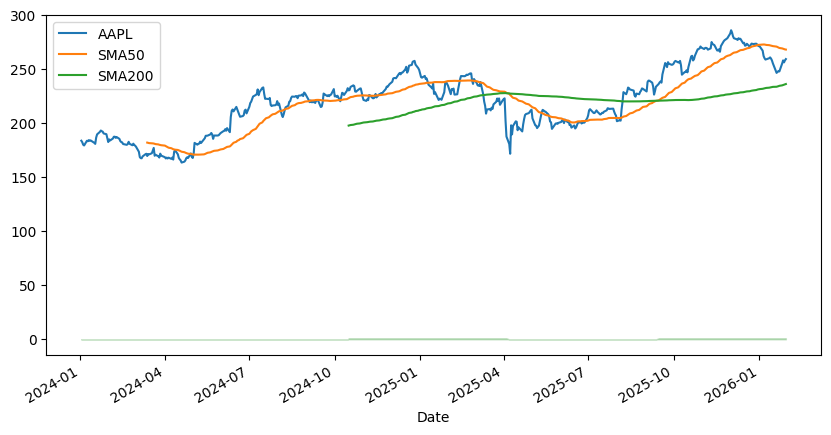

In [95]:
data_strat = pd . DataFrame ( close_prices ['AAPL'].dropna())
data_strat['SMA50'] = data_strat ['AAPL']. rolling (50) . mean ()
data_strat['SMA200'] = data_strat ['AAPL']. rolling (200) . mean ()
# Signalas : 1 ( pirkti ) , 0 ( laukti )
data_strat ['Signal'] = 0
data_strat . loc [ data_strat ['SMA50'] > data_strat ['SMA200'] ,'Signal'] = 1
data_strat [['AAPL','SMA50','SMA200']]. plot ( figsize =(10 ,5) )
plt . fill_between ( data_strat . index , data_strat ['Signal'] , alpha =0.2 , color ='green')
plt . show ()

In [96]:
print(data_strat)

                  AAPL       SMA50      SMA200  Signal
Date                                                  
2024-01-02  183.731323         NaN         NaN       0
2024-01-03  182.355621         NaN         NaN       0
2024-01-04  180.039658         NaN         NaN       0
2024-01-05  179.317154         NaN         NaN       0
2024-01-08  183.652115         NaN         NaN       0
...                ...         ...         ...     ...
2026-01-26  255.171234  269.119779  234.932628       1
2026-01-27  258.028534  268.816063  235.232835       1
2026-01-28  256.200287  268.486171  235.565868       1
2026-01-29  258.038544  268.203835  235.869610       1
2026-01-30  259.237427  268.044385  236.157592       1

[522 rows x 4 columns]


In [101]:
print(returns)

Date
2024-01-03   -0.007488
2024-01-04   -0.012700
2024-01-05   -0.004013
2024-01-09   -0.002263
2024-01-10    0.005671
                ...   
2026-01-23   -0.001248
2026-01-27    0.011198
2026-01-28   -0.007085
2026-01-29    0.007175
2026-01-30    0.004646
Name: AAPL, Length: 403, dtype: float64


[*********************100%***********************]  1 of 1 completed


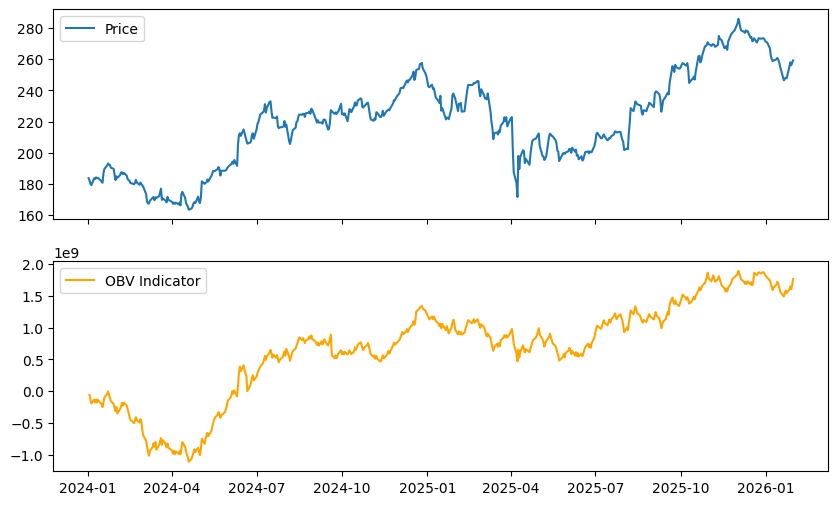

In [104]:
# Apskaiciuojame AAPL grazas is jau turimo close_prices
aapl_prices = close_prices['AAPL'].dropna()
aapl_returns = aapl_prices.pct_change().dropna()

# Parsiunčiame AAPL apimtis ir atsikratome MultiIndex stulpeliu
vol_data = yf.download('AAPL', start='2024-01-01')
if isinstance(vol_data.columns, pd.MultiIndex):
    vol_data = vol_data.xs('AAPL', axis=1, level=1)
volume = vol_data['Volume']

# Sulyginame indeksus (aapl_returns ir volume turi sutapti)
common_idx = aapl_returns.index.intersection(volume.index)
aapl_returns = aapl_returns.loc[common_idx]
volume = volume.loc[common_idx]

# OBV skaiciavimas
obv = (np.sign(aapl_returns) * volume).cumsum()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
ax1.plot(aapl_prices, label='Price')
ax2.plot(obv, color='orange', label='OBV Indicator')
ax1.legend(); ax2.legend()
plt.show()


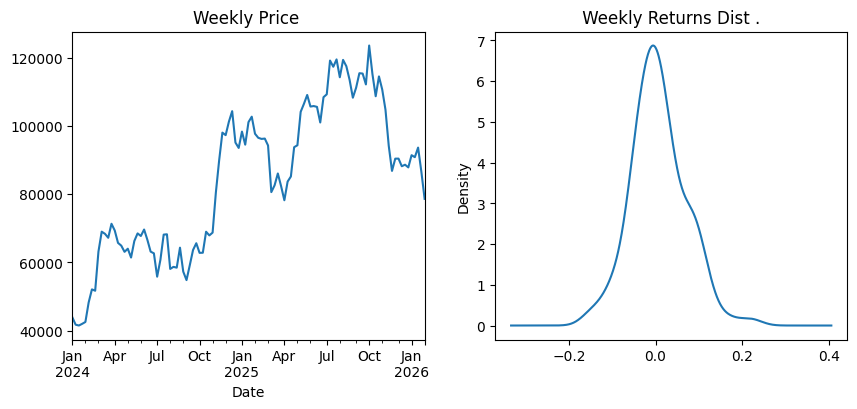

In [ ]:
# Sugrupuojame i savaites ( W ) ir paimame p a s k u t i n k a i n
weekly_data = close_prices ['BTC-USD']. resample ('W') . last ()
weekly_returns = weekly_data . pct_change ()
plt . figure ( figsize =(10 ,4) )
plt . subplot (1 ,2 ,1) ; weekly_data . plot ( title = "Weekly Price " )
plt . subplot (1 ,2 ,2) ; weekly_returns . plot ( kind ='kde', title = " Weekly Returns Dist . " )
plt . show ()

In [ ]:
# Parsisiunciame rinkos indeksa ( S & P 500)
market_raw = yf.download("^GSPC", start="2024-01-01", auto_adjust=False)["Adj Close"]
# yf.download grazina MultiIndex, .squeeze() pavercia i Series
market = market_raw.squeeze().pct_change().dropna()

# Naudojame aapl_returns (jau apskaiciuota ankstesneje celeje)
stock = aapl_returns

# Sulyginame indeksus pries regresija
common = market.index.intersection(stock.index)
market_aligned = market.loc[common]
stock_aligned = stock.loc[common]

# Tiesinė regresija
beta, alpha = np.polyfit(market_aligned, stock_aligned, 1)
print(f" Apple Beta : {beta:.2f} ")
# Jei Beta > 1, akcija svyruoja stipriau nei rinka.


[*********************100%***********************]  1 of 1 completed

 Apple Beta : 1.19 


In [ ]:
print(yf . download ('^GSPC', start ='2024-01-01', auto_adjust=False)['Adj Close'])

[*********************100%***********************]  1 of 1 completed

Ticker            ^GSPC
Date                   
2024-01-02  4742.830078
2024-01-03  4704.810059
2024-01-04  4688.680176
2024-01-05  4697.240234
2024-01-08  4763.540039
...                 ...
2026-02-12  6832.759766
2026-02-13  6836.169922
2026-02-17  6843.220215
2026-02-18  6881.310059
2026-02-19  6861.890137

[535 rows x 1 columns]


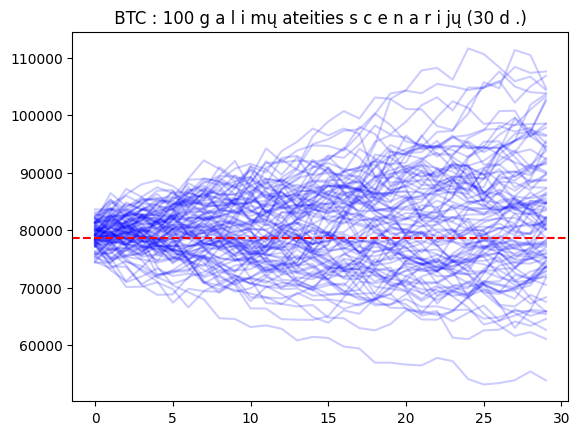

In [ ]:
# Parametrai is istorijos
S0 = close_prices ['BTC-USD']. iloc [ -1]
btc_prices = close_prices['BTC-USD'].dropna()
btc_returns = btc_prices.pct_change().dropna()
mu = btc_returns.mean()
sigma = btc_returns.std()
T = 30 # Prognoze 30-ciai dienu
for i in range (100) :
    daily_returns = np . random . normal ( mu , sigma , T )
    price_path = S0 * np . exp ( np . cumsum ( daily_returns ) )
    plt . plot ( price_path , alpha =0.2 , color ='blue')
plt . axhline ( S0 , color ='red', linestyle ='--')
plt . title ( " BTC : 100 g a l i mų ateities s c e n a r i jų (30 d .) " )
plt . show ()

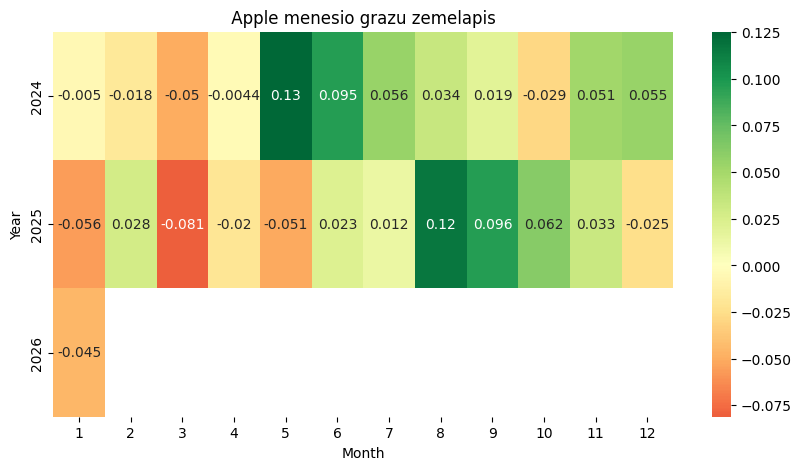

In [129]:
import seaborn as sns
# Grupuojame duomenis pagal metus ir menesius
returns_m = aapl_returns. resample ('ME') . sum ()
df_heatmap = returns_m . to_frame ()
df_heatmap ['Year'] = df_heatmap . index . year
df_heatmap ['Month'] = df_heatmap . index . month
pivot_table = df_heatmap . pivot ( index ='Year', columns ='Month', values ='AAPL')
plt . figure ( figsize =(10 ,5) )
sns . heatmap ( pivot_table , annot = True , center =0 , cmap ='RdYlGn')
plt . title ( " Apple menesio grazu zemelapis " )
plt . show ()

Kointegracijos P-reiksme : 0.7400 


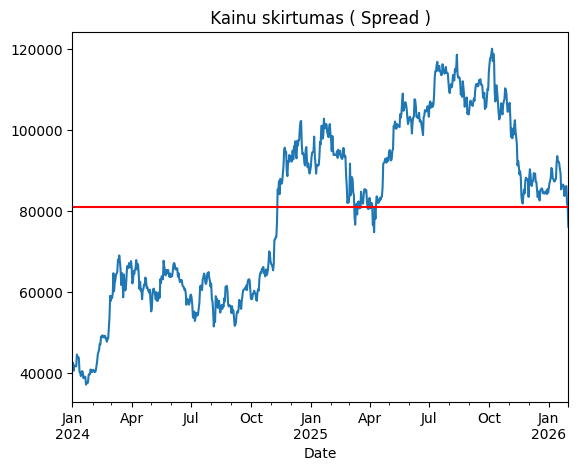

In [134]:
from statsmodels . tsa . stattools import coint
# Lyginame dvi panasias akcijas ( pvz . KO ir PEP arba BTC ir ETH )
score , pvalue , _ = coint ( close_prices ['BTC-USD'] , close_prices ['ETH-USD'])
print ( f"Kointegracijos P-reiksme : { pvalue :.4f} " )
# Jei p-reiksme < 0.05 , pora yra kointegruota ( tinkama prekybai )
spread = close_prices ['BTC-USD']-close_prices ['ETH-USD']
spread . plot ( title = " Kainu skirtumas ( Spread ) " )
plt . axhline ( spread . mean () , color ='red')
plt . show ()

In [ ]:
# Paprasta Hurst skaiciavimo logika
def hurst ( ts ) :
    lags = range (2 , 100)
    tau = [ np . sqrt ( np . std ( np . subtract ( ts [ lag :] , ts [: - lag ]) ) ) for lag in lags ]
    poly = np . polyfit ( np . log ( lags ) , np . log ( tau ) , 1)
    return poly [0] * 2.0
h_val = hurst ( close_prices ['BTC-USD']. values )
print ( f"Hurst koeficientas : { h_val :.2f} " )
# H < 0.5: Mean - reverting ; H > 0.5: Trending ; H = 0.5: Random Walk

Hurst koeficientas : 0.52 


In [ ]:
# Simuliuojame pirkima konkrecia diena
entry_price = close_prices ['AAPL']. iloc [ -20]
prices_after = close_prices ['AAPL']. iloc [ -20:]
mae = ( prices_after . min () - entry_price ) / entry_price
mfe = ( prices_after . max () - entry_price ) / entry_price
print ( f" Max Adverse Excursion ( MAE ) : { mae :.2%} " )
print ( f" Max Favorable Excursion ( MFE ) : { mfe :.2%} " )

 Max Adverse Excursion ( MAE ) : -5.21% 
 Max Favorable Excursion ( MFE ) : 0.31% 


In [140]:
print ( f" Asimetrija ( Skewness ) : { aapl_returns. skew () :.2f} " )
print ( f" Virsis ( Kurtosis ) : { aapl_returns. kurtosis () :.2f} " )

 Asimetrija ( Skewness ) : 0.99 
 Virsis ( Kurtosis ) : 13.89 


In [143]:
active_return = aapl_returns - market # market yra S & P 500 grazos
tracking_error = active_return . std () * np . sqrt (252)
info_ratio = ( annual_return - market . mean () *252) / tracking_error
print ( f" Information Ratio : { info_ratio :.2f} " )

 Information Ratio : 0.40 


In [150]:
# Supaprastinta Delta skaiciavimo logika
def calculate_delta(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    return stats.norm.cdf(d1)

S0 = close_prices['AAPL'].dropna().iloc[-1]
# Apskaiciuojame AAPL metini volatiluma is aapl_returns (ne BTC returns)
aapl_annual_std = aapl_returns.std() * np.sqrt(252)
delta = calculate_delta(S0, S0 * 1.05, 30/365, 0.05, aapl_annual_std)
print(f"Opciono Delta : {delta:.2f}")


Opciono Delta : 0.30


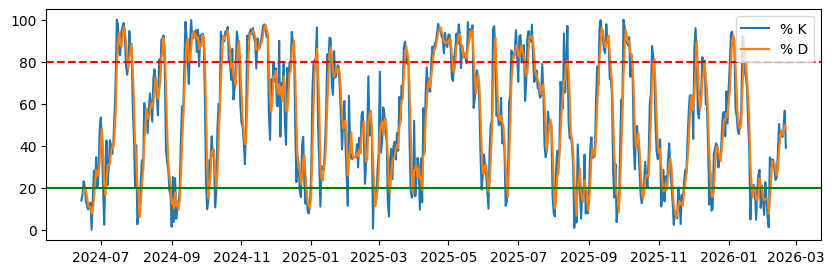

In [146]:
low_14 = df ['Low']. rolling (14) . min ()
high_14 = df ['High']. rolling (14) . max ()
k_line = 100 * ( df ['Close'] - low_14 ) / ( high_14 - low_14 )
d_line = k_line . rolling (3) . mean ()
plt . figure ( figsize =(10 ,3) )
plt . plot ( k_line , label ='% K') ; plt . plot ( d_line , label ='% D')
plt . axhline (80 , color ='red', linestyle ='--') ; plt . axhline (20 , color ='green')
plt . legend () ; plt . show ()

In [154]:
from scipy.optimize import minimize


def portfolio_vol(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)


# Naudojame faktini matricos dydi (kai kurie tickers gali buti neparsisiuste)
num_assets = corr_matrix.shape[0]
constraints = {"type": "eq", "fun": lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for asset in range(num_assets))
res = minimize(
    portfolio_vol,
    num_assets * [1.0 / num_assets],
    args=corr_matrix,
    method="SLSQP",
    bounds=bounds,
    constraints=constraints,
)
print(" Optimalus svoriai : ", res.x)
print(" Aktyvu pavadinimai : ", list(corr_matrix.columns))


 Optimalus svoriai :  [0.18908023 0.21866659 0.28353261 0.01690012 0.29182044]
 Aktyvu pavadinimai :  ['AAPL', 'BTC-USD', 'GC=F', 'IXUA.DE', 'VWCE.DE']


In [155]:
# Surandame blogiausia diena istorijoje
worst_day_return = returns . min ()
portfolio_loss = np . sum ( res . x * worst_day_return )
print (f"Blogiausias vienos dienos scenarijus : { portfolio_loss :.22%} " )

Blogiausias vienos dienos scenarijus : -9.2456100553747653236769% 


In [157]:
# Imituojame LOB duomenis ( Bid / Ask apimtis )
bid_v = 1500; ask_v = 400
rho = ( bid_v - ask_v ) / ( bid_v + ask_v )
print (f"LOB Imbalance : { rho :.2f} " )
# Jei rho > 0.5 , didele tikimybe , kad kaina kils artimiausiomis milisekundemis .

LOB Imbalance : 0.58 


In [158]:
win_prob = 0.55 # Tikimybe laimeti ( is backtesto )
win_loss_ratio = 1.2 # Kiek laimime vs kiek prarandame
kelly_f = win_prob - (1 - win_prob ) / win_loss_ratio
print (f"Kelly Fraction : { kelly_f :.2%} " )
# Tai dalis kapitalo , kuria turime rizikuoti viename sandoryje .

Kelly Fraction : 17.50% 


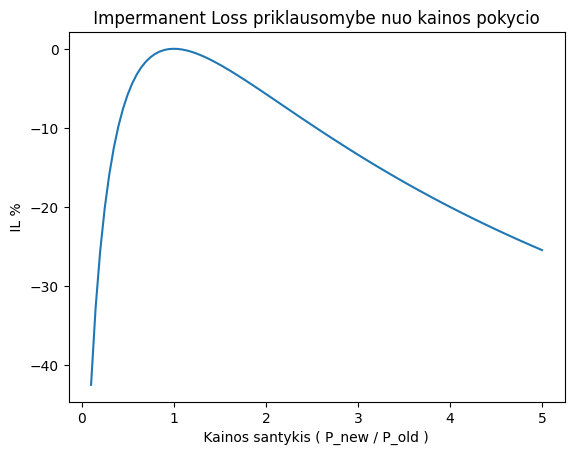

In [159]:
price_ratio = np . linspace (0.1 , 5 , 100)
il = (2 * np . sqrt ( price_ratio ) / (1 + price_ratio ) ) - 1
plt . plot ( price_ratio , il * 100)
plt . title ( " Impermanent Loss priklausomybe nuo kainos pokycio " )
plt . xlabel ( " Kainos santykis ( P_new / P_old ) " ) ; plt . ylabel ( " IL % " )
plt . show ()

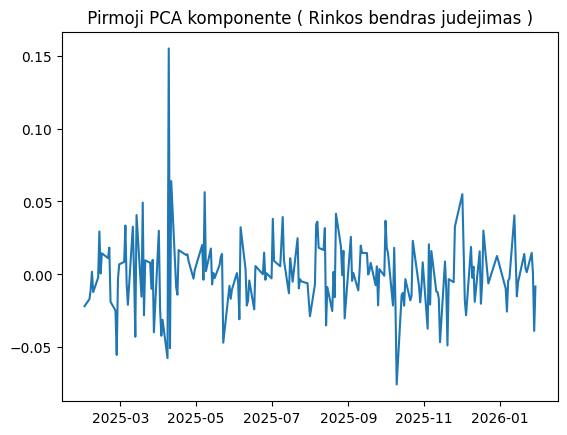

In [162]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(all_returns)
market_component = pca.transform(all_returns)
plt.plot(all_returns.index, market_component)
plt.title(" Pirmoji PCA komponente ( Rinkos bendras judejimas ) ")
plt.show()
